In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exploratory-data-analysis-on-netflix-data/netflix_titles_2021.csv
/kaggle/input/exploratory-data-analysis-on-netflix-data/netflix img.png


In [2]:
df=pd.read_csv("/kaggle/input/exploratory-data-analysis-on-netflix-data/netflix_titles_2021.csv")


In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df["type"]

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [6]:
#What types of shows or movies are uploaded on Netflix?

df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [7]:
# What is the correlation between features?:
# First check/evalute duration column values:

df["duration"].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [8]:
import pandas as pd


# Function to extract movie duration in minutes from duration column:
def get_minutes(duration):
    if isinstance(duration, str) and 'min' in duration:
        return int(duration.replace('min', '').strip())
    return None

# Function to extract number of seasons from duration column:
def get_seasons(duration):
    if isinstance(duration, str) and ('Season' in duration or "Seasons" in duration):
        return int(duration.split()[0])
    return None

# Apply the functions
df['duration_minutes'] = df['duration'].apply(get_minutes)
df['num_seasons'] = df['duration'].apply(get_seasons)


In [9]:
# Dropping original column:

df.drop("duration",axis=1,inplace=True)

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


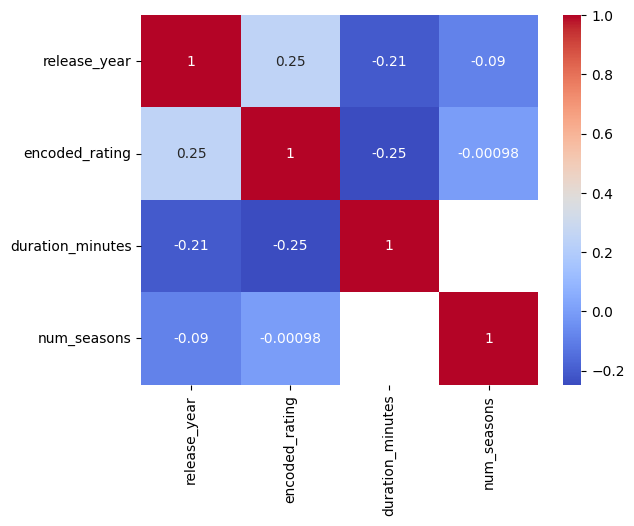

In [10]:
#What is the correlation between features?:
# for preprocessing transform rating column:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["encoded_rating"]=le.fit_transform(df["rating"])


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_features = ['release_year', 'encoded_rating', 'duration_minutes',"num_seasons"]

# Apply Correlation:
correlation_matrix = df[numerical_features].corr()

# Plot Heatmap:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
#Which shows are most watched on Netflix?

df["type"].iloc[0]

'Movie'

In [12]:
#OR :
len(df[df["type"]=="Movie"])

6131

In [13]:
#What is the distribution of ratings?
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


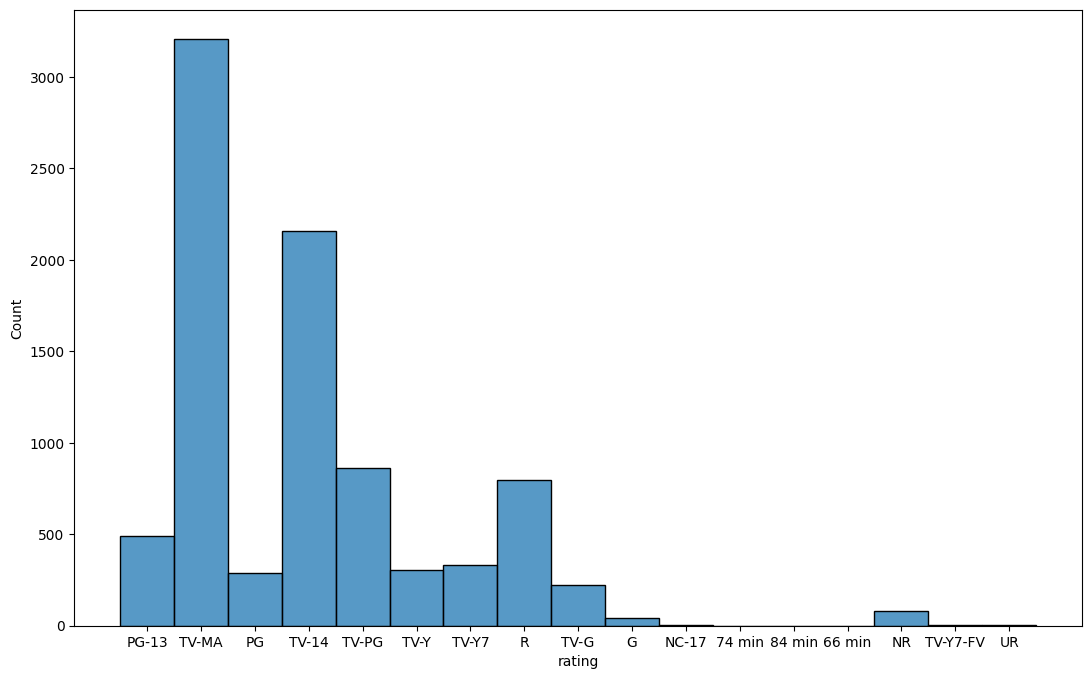

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,8))
sns.histplot(df['rating'],bins=30)
plt.title=("Distribution Of ratings")
plt.xlabel=("rating")
plt.ylabel=("frequency")
plt.show()

#distribution of rating is positively skewed.

In [15]:
#Which has the highest rating: TV shows or movies?

avg_ratings= df.groupby('type')['encoded_rating'].mean()
hig_avg_ratings=avg_ratings.idxmax()
print(f"The highest rating is of:{hig_avg_ratings}")

The highest rating is of:TV Show


In [16]:
# What is the best month for releasing content?

avg_ratings=df.groupby("date_added")['encoded_rating'].mean()
avg_ratings.sort_values(ascending=False)
best_month= avg_ratings.idxmax()
print(f"The best_month for releasing content is :{best_month}")

The best_month for releasing content is :January 26, 2017


In [17]:
#Which genres are most watched on Netflix?
genre_no=df["listed_in"].value_counts()
h_genre=genre_no.idxmax()
print(f"most watched genre on Netflix is:{h_genre}")

most watched genre on Netflix is:Dramas, International Movies


In [18]:
#How many movies have been released over the years?
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [19]:
#How many movies were made per year?
movies_per_year=df.groupby('release_year')['show_id'].count()
movies_per_year

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: show_id, Length: 74, dtype: int64

In [20]:
#What is the show ID and director for 'House of Cards'?
show_id=df[(df["title"]=="House of Cards")]["show_id"].iloc[0]
director=df[(df["title"]=="House of Cards")]["director"].iloc[0]
show_id,director

('s1060', nan)

In [21]:
##OR 

house_of_cards_data=df[(df["title"]=="House of Cards")]

show_id = house_of_cards_data['show_id'].iloc[0]  # Assuming show_id is unique
director = house_of_cards_data['director'].iloc[0]  # Assuming director is available   
print(f"Show ID for 'House of Cards': {show_id}")
print(f"Director for 'House of Cards': {director}")

Show ID for 'House of Cards': s1060
Director for 'House of Cards': nan


In [22]:
#List all movies released in 2000.

# Filter the DataFrame
movies_2000 = df[df['release_year'] == 2000]
movies_2000
# Print the titles
for title in movies_2000['title']:
    print(title)

The Nutty Professor II: The Klumps
Space Cowboys
The Original Kings of Comedy
Charlie's Angels
Snow Day
Battlefield Earth
The Whole Nine Yards
Moesha
Rugrats in Paris: The Movie
Monty Python: Before the Flying Circus
Fiza
Phir Bhi Dil Hai Hindustani
Pokémon: Indigo League
Star Trek: Voyager
Joseph: King of Dreams
28 Days
American Psycho
An American Tail: The Treasures of Manhattan Island
Billy Elliot
Center Stage
Chal Mere Bhai
Crouching Tiger, Hidden Dragon
Dragonheart: A New Beginning
Final Destination
Hamara Dil Aapke Paas Hai
How the Grinch Stole Christmas
Kya Kehna
Little Nicky
Papa the Great
Power Rangers Lightspeed Rescue
Pukar
Scary Movie
Scream 3
The Art of War
The Flintstones in Viva Rock Vegas
What Lies Beneath
Where the Money Is


In [23]:
#Show only the titles of TV shows released in India.
Movies_In=df[(df["type"]=="TV Show") & (df["country"]=="India")]
for title in Movies_In["title"]:
    print(title)

Kota Factory
Chhota Bheem
Dharmakshetra
Raja Rasoi Aur Anya Kahaniyan
Stories by Rabindranath Tagore
The Creative Indians
Navarasa
Alma Matters
Sab Jholmaal Hai
Lava Ka Dhaava
The Big Day
Bombay Begums
Zindagi in Short
Pitta Kathalu
Mighty Little Bheem: Kite Festival
Regiment Diaries
Paava Kadhaigal
Bhaag Beanie Bhaag
Fabulous Lives of Bollywood Wives
Mismatched
Bad Boy Billionaires: India
Masaba Masaba
Little Singham
Betaal
ChuChu TV Nursery Rhymes & Kids Songs (Hindi)
Hasmukh
Akbar Birbal
Ladies Up
She
Mighty Little Bheem: Festival of Colors
Taj Mahal 1989
Jamtara - Sabka Number Ayega
Little Things
Mighty Little Bheem: Diwali
College Romance
Engineering Girls
Girls Hostel
Inmates
Bard of Blood
Typewriter
Leila
Delhi Crime
Cricket Fever: Mumbai Indians
Selection Day
GHOUL
21 Sarfarosh: Saragarhi 1897
7 (Seven)
Agent Raghav
Anjaan: Rural Myths
Anjaan: Special Crimes Unit
Badalte Rishton Ki Dastaan
Bh Se Bhade
Bhaage Re Mann
Classic Legends
Darr Sabko Lagta Hai
Devlok with Devdutt Patta

In [24]:
#Identify the top 10 directors who have contributed the most TV shows and movies to Netflix
top_10=df["director"].value_counts().sort_values(ascending=False)
top_10.head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          11
Name: count, dtype: int64

In [25]:
#How many movies/TV shows has Tom Cruise been cast in?

tom_df=df[df["cast"].str.contains("Tom Cruise",na= False)]
len(tom_df)
print(f"Tom Cruise has been cast in {len(tom_df)} movies/TV shows on Netflix.")

Tom Cruise has been cast in 2 movies/TV shows on Netflix.


In [26]:
#How many movies have a "TV-14" rating in Canada?

df_movies=df[(df["rating"]=="TV-14")&(df["type"]=="Movie")&(df["country"]=="Canada")]
len(df_movies)

13